# Loan Application Status Prediction.

Data Description.

Importing Required Libraries.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the data.

In [67]:
df=pd.read_csv('Loan.csv')

In [68]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
df.shape     #checking data dimensions.

(614, 13)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [71]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

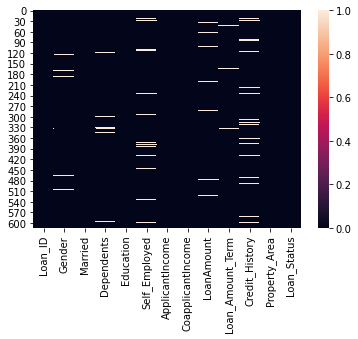

In [72]:
sns.heatmap(df.isnull())
plt.show()

Statistical Summary.

In [73]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Analysis.

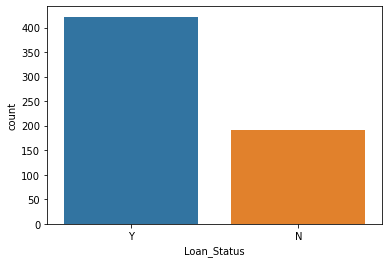

Y    422
N    192
Name: Loan_Status, dtype: int64

In [74]:
sns.countplot(x='Loan_Status',data=df)
plt.show()
df['Loan_Status'].value_counts()

In [75]:
cate=['Gender', 'Married','Education','Self_Employed','Property_Area','Dependents','Credit_History']
Num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'] 

Male      489
Female    112
Name: Gender, dtype: int64


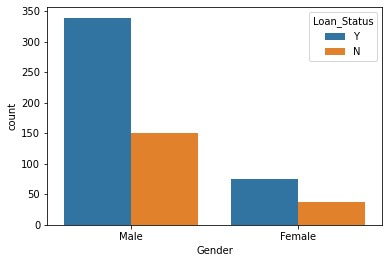

Yes    398
No     213
Name: Married, dtype: int64


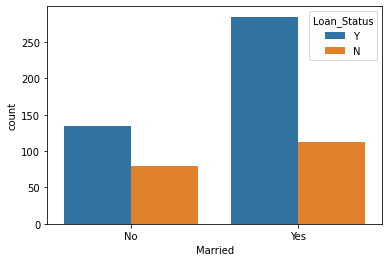

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


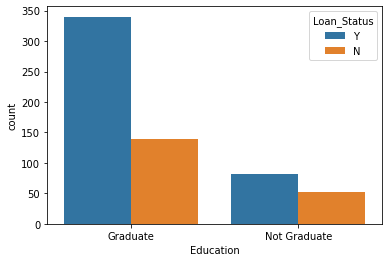

No     500
Yes     82
Name: Self_Employed, dtype: int64


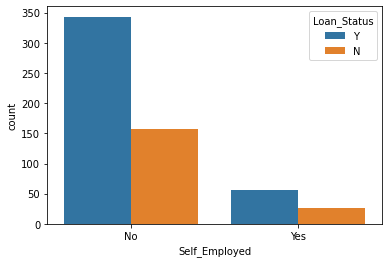

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


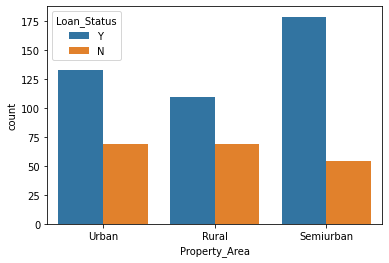

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


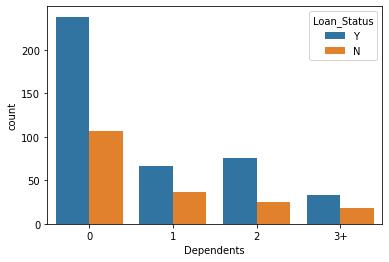

1.0    475
0.0     89
Name: Credit_History, dtype: int64


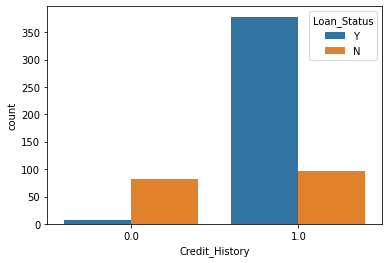

In [76]:
for m in cate:
    sns.countplot(x=m,hue='Loan_Status',data=df)
    print(df[m].value_counts())
    plt.show()

Checking skewness and outliers.

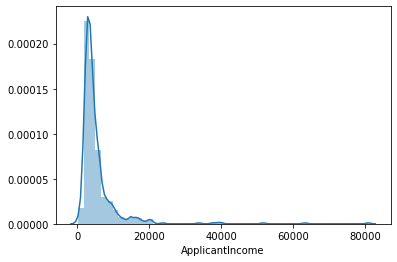

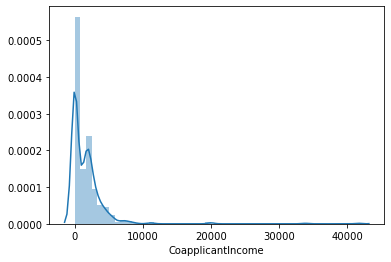

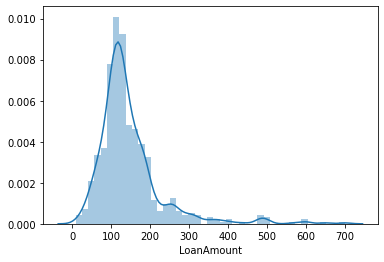

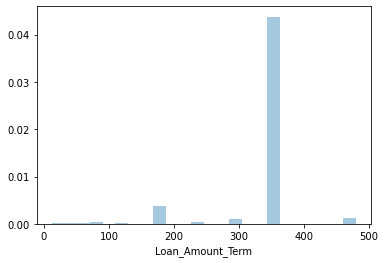

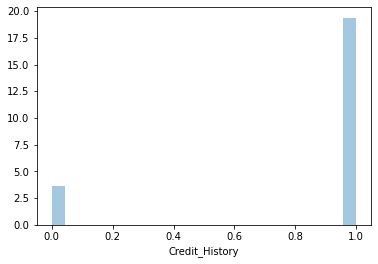

In [77]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show()

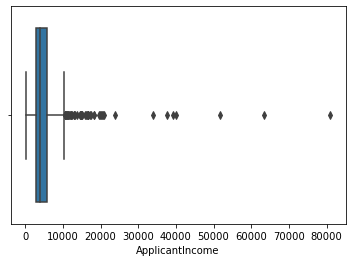

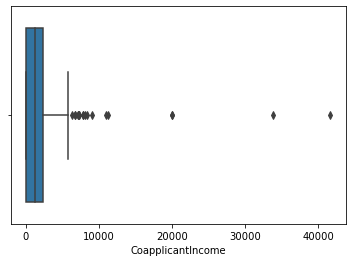

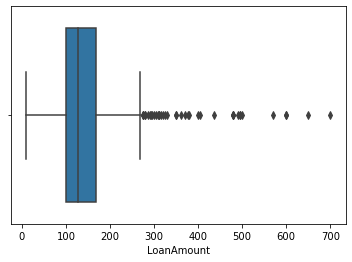

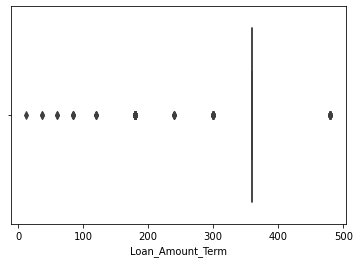

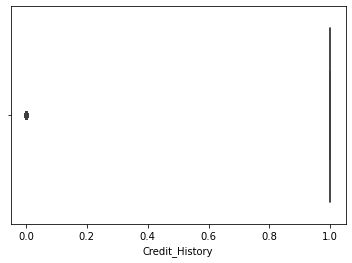

In [78]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

Missing values

In [79]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
from sklearn.impute import SimpleImputer

In [81]:
imp=SimpleImputer(missing_values=np.nan, strategy='mean')

In [82]:
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [83]:
impl=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [84]:
df['Credit_History']=impl.fit_transform(df['Credit_History'].values.reshape(-1,1))
df['Dependents']=impl.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=impl.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Married']=impl.fit_transform(df['Married'].values.reshape(-1,1))
df['Gender']=impl.fit_transform(df['Gender'].values.reshape(-1,1))

In [85]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Treating Skewness and Outliers

In [86]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

In [87]:
from sklearn.preprocessing import power_transform

In [88]:
df['ApplicantIncome']=power_transform(df['ApplicantIncome'].values.reshape(-1,1))
df['CoapplicantIncome']=power_transform(df['CoapplicantIncome'].values.reshape(-1,1))
df['LoanAmount']=power_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=power_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [89]:
df.skew()

ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Credit_History      -2.021971
dtype: float64

Encoding

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
le=LabelEncoder()

In [92]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.544331,-1.102837,0.235387,0.185905,1.0,Urban,Y


In [93]:
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [94]:
df['Dependents']=df['Dependents'].replace('3+',3)

In [95]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [96]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.544331,-1.102837,0.235387,0.185905,1.0,2,1
1,LP001003,1,1,1,0,0,0.170974,0.750578,-0.037659,0.185905,1.0,0,0
2,LP001005,1,1,0,0,1,-0.499955,-1.102837,-1.346305,0.185905,1.0,2,1
3,LP001006,1,1,0,1,0,-0.743873,0.891686,-0.167886,0.185905,1.0,2,1
4,LP001008,1,0,0,0,0,0.582817,-1.102837,0.158610,0.185905,1.0,2,1


In [97]:
df.drop('Loan_ID',inplace=True,axis=1)

In [98]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.544331,-1.102837,0.235387,0.185905,1.0,2,1
1,1,1,1,0,0,0.170974,0.750578,-0.037659,0.185905,1.0,0,0
2,1,1,0,0,1,-0.499955,-1.102837,-1.346305,0.185905,1.0,2,1
3,1,1,0,1,0,-0.743873,0.891686,-0.167886,0.185905,1.0,2,1
4,1,0,0,0,0,0.582817,-1.102837,0.158610,0.185905,1.0,2,1


In [99]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [100]:
print(x.shape)
print(y.shape)

(614, 11)
(614,)


In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
sc=StandardScaler()

In [103]:
x=sc.fit_transform(x)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
lr=LogisticRegression()
dr=DecisionTreeClassifier()
svc=SVC()
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [106]:
model=[lr,dr,svc,rf]

Splitting the data.

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

In [108]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.7891891891891892
[[ 27  35]
 [  4 119]]
              precision    recall  f1-score   support

           0       0.87      0.44      0.58        62
           1       0.77      0.97      0.86       123

    accuracy                           0.79       185
   macro avg       0.82      0.70      0.72       185
weighted avg       0.81      0.79      0.77       185



accuracy score of DecisionTreeClassifier() is:
0.7135135135135136
[[34 28]
 [25 98]]
              precision    recall  f1-score   support

           0       0.58      0.55      0.56        62
           1       0.78      0.80      0.79       123

    accuracy                           0.71       185
   macro avg       0.68      0.67      0.67       185
weighted avg       0.71      0.71      0.71       185



accuracy score of SVC() is:
0.7837837837837838
[[ 26  36]
 [  4 119]]
              precision    recall  f1-score   support

           0       0.87      0.42      0.57    

Cross-Validation.

In [109]:
from sklearn.model_selection import cross_val_score

In [110]:
Lrs=cross_val_score(lr,x,y,cv=5)
print('cross validation of LogisticRegression:',Lrs.mean())

cross validation of LogisticRegression: 0.8061975209916034


In [111]:
drs=cross_val_score(dr,x,y,cv=5)
print('cross validation of DecisionTreeClassiffier:',drs.mean())

cross validation of DecisionTreeClassiffier: 0.7247634279621484


In [112]:
svr=cross_val_score(svc,x,y,cv=5)
print('cross validation of SVM:',svr.mean())

cross validation of SVM: 0.8078235372517659


In [113]:
rfr=cross_val_score(rf,x,y,cv=5)
print('cross valdation of RandomForestClassifier:',rfr.mean())

cross valdation of RandomForestClassifier: 0.7818072770891644


Hyper Parameter Tuning.

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
grid_param={'criterion':['gini','entropy']}
gd=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd.fit(x,y)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'entropy'}


In [118]:
gd_pred=gd.best_estimator_.predict(x_test)

In [119]:
accuracy_score(y_test,gd_pred)

1.0

In [120]:
print(confusion_matrix(y_test,gd_pred))
print(classification_report(y_test,gd_pred))

[[ 62   0]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       123

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



Saving the Best Model.

In [121]:
import joblib
joblib.dump(gd.best_estimator_,'Loan.pkl')

['Loan.pkl']